# **MÓDULO 12 - Pratique**


Abaixo temos um dataframe com as seguintes informações:


**Nome:** O nome de cada indivíduo da base


**Idade:** A idade de cada um deles


**Profissão:** A atual ocupação


**Salário:** O salário registrado


**Limite de crédito:** O limite de crédito disponível para cada um dos indivíduos


**Historico_Inadimplencia:** Marco como 0 aqueles que nunca tiveram um histórico de inadimplência e como 1 aqueles que já tiveram em algum momento.


**Estado civil:** O estado civil de cada um deles


**Imovel_Proprio:** Marcado como 0 aqueles que não tem imóvel próprio e como 1 aqueles que tem.

In [ ]:
!pip install pandas
!pip install plotly
!pip install numpy
!pip install matplotlib
!pip install seaborn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns

In [2]:
data = {
    'Nome': ['Alice', 'Joao', 'Charlie', 'David', 'Eva', 'Diego', 'Denize', 'Claudio'],
    'Idade': [25, 30, 35, 40, 45, 60, 22, 24],
    'Profissão': ['Engenheiro', 'Médico', 'Professor', 'Advogado', 'Médico','Engenheiro', 'Estudante','Estudante'],
    'Salário': ['4500', '8000', '5000', '10000', '12000','15000', '1200','1500'],
    'Limite_Credito': ['2500', '4000', '4000', '1000', '10000','2000', '500','250'],
    'Historico_Inadimplencia': ['0', '0', '0', '1', '0','1', '0','1'],
    'Estado_Civil': ['Casamento', 'Casamento', 'Solteiro', 'Solteiro', 'Casamento','Solteiro', 'Solteiro','Solteiro'],
    'Imovel_Proprio': ['0', '0', '0', '1', '1','1', '0','0']
}

df = pd.DataFrame(data)
df.head(5)

,Nome,Idade,Profissão,Salário,Limite_Credito,Historico_Inadimplencia,Estado_Civil,Imovel_Proprio
0,Alice,25,Engenheiro,4500,2500,0,Casamento,0
1,Joao,30,Médico,8000,4000,0,Casamento,0
2,Charlie,35,Professor,5000,4000,0,Solteiro,0
3,David,40,Advogado,10000,1000,1,Solteiro,1
4,Eva,45,Médico,12000,10000,0,Casamento,1


A proposta da atividade é que utilizem os dados do DataFrame Data e escolham apenas 3 gráficos que ajudem vocês a identificar quais fatores são os principais impulsionadores para aqueles que tem limite de crédito alto.

Durante a exploração de vocês podem utilizar mais de 3 gráficos mas deixem na entrega final apenas os 3 mais assertivos que contenham a informação da mensagem que querem passar, fiquem livres para utilizar as bibliotecas que quiserem para os gráficos.

Justifiquem a escolha dos visuais e despertem o lado analítico de vocês com uma análise acerca do descoberto através dos gráficos. Lembrem o que aprendemos na aula, devemos ser assertivos na nossa mensagem.

## Conversão de Tipos

In [3]:
df['Salário'] = df['Salário'].astype(int)
df['Idade'] = df['Idade'].astype(int)
df['Limite_Credito'] = df['Limite_Credito'].astype(int)
df['Imovel_Proprio'] = df['Imovel_Proprio'].astype(int)
df['Historico_Inadimplencia'] = df['Historico_Inadimplencia'].astype(int)

## Análise: Gráfico de Correlação

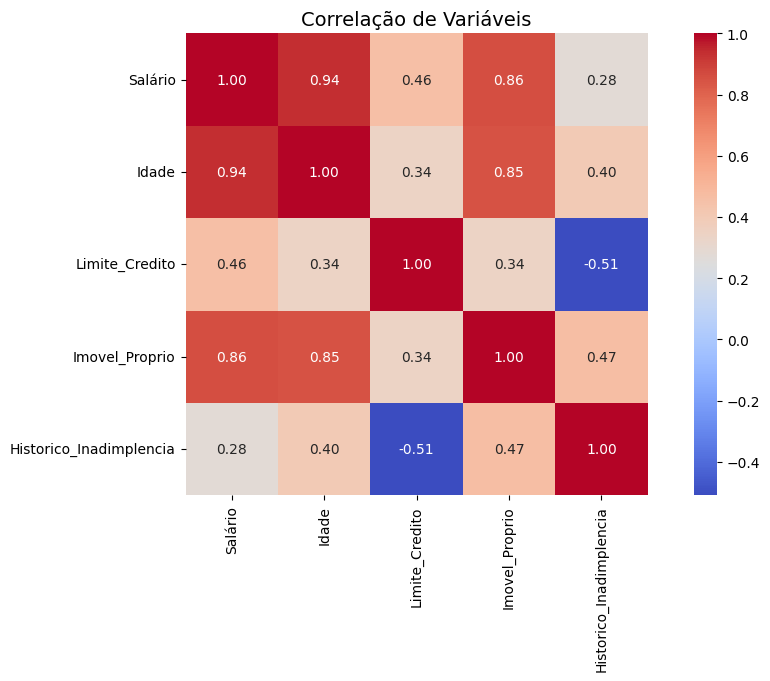

In [4]:
# Criação de correlação entre variáveis
df_corr = df[['Salário', 'Idade', 'Limite_Credito', 'Imovel_Proprio', 'Historico_Inadimplencia']]
corr_matriz = df_corr.corr()

# Criação de mapa de calor
plt.figure(figsize=(12,6))
sns.heatmap(
    corr_matriz,
    annot=True,  # Mostra os valores no gráfico
    fmt=".2f",   # Formato dos números
    cmap="coolwarm",  # Paleta de cores
    cbar=True,  # Barra de cores
    square=True  # Quadrados proporcionais
)

# Ajuste de titulo e apresentação do gráfico
plt.title('Correlação de Variáveis', fontsize=14)
plt.savefig("grafico_calor.png", dpi=300, bbox_inches='tight')
plt.show()

## Criação de Features

In [5]:
# Criação de variável para inadimplencia
inadim = {
    0: 'Não',
    1: 'Sim'
}
df['Inadimplencia'] = df['Historico_Inadimplencia'].map(inadim)

In [6]:
# Criação de variável para imóvel próprio
imovel_proprio = {
    0: "Não",
    1: "Sim"
}
df['Imovel_Proprio_Caracter'] = df['Imovel_Proprio'].map(imovel_proprio)

## Gráficos

### Média Salarial e Limite de Crédito por Profissão 

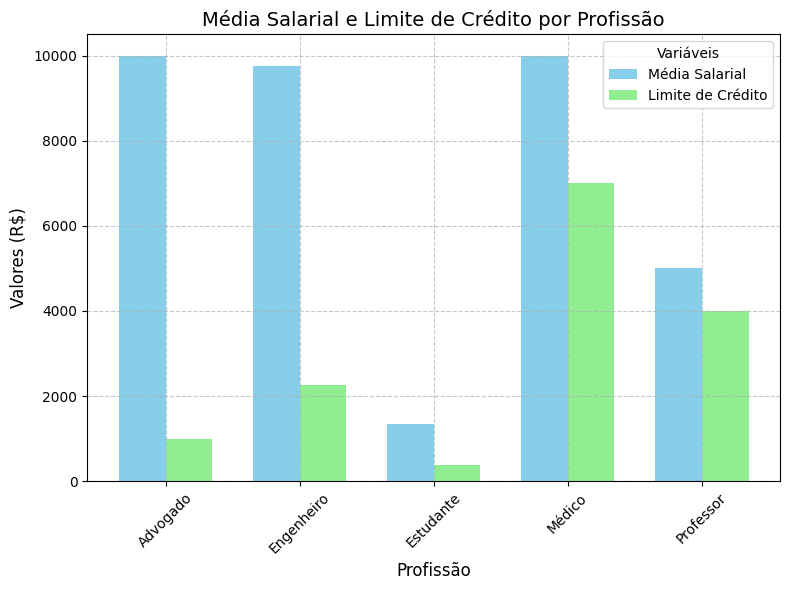

In [7]:
# Agrupamento de variáveis
salario_profissao = df.groupby('Profissão')['Salário'].mean()
limite_credito_profissao = df.groupby('Profissão')['Limite_Credito'].mean()

# Configuração do gráfico de barras agrupadas
x = range(len(salario_profissao))  # Posição das barras
width = 0.35  # Largura de cada barra

# Criação de gráfico de barras
plt.figure(figsize=(8,6))
# Barras para salário
plt.bar(x, salario_profissao, width=width, label='Média Salarial', color='skyblue')
# Barras para limite de crédito (deslocadas para a direita)
plt.bar(
    [pos + width for pos in x], 
    limite_credito_profissao, 
    width=width, 
    label='Limite de Crédito', 
    color='lightgreen'
)

# Adicionando rótulos e legendas
plt.title("Média Salarial e Limite de Crédito por Profissão", fontsize=14)
plt.xlabel("Profissão", fontsize=12)
plt.ylabel("Valores (R$)", fontsize=12)
plt.xticks([pos + width / 2 for pos in x], salario_profissao.index, rotation=45)
plt.legend(title="Variáveis")
plt.grid(True, linestyle='--', alpha=0.7)

# Exibição do gráfico
plt.tight_layout()
plt.savefig("grafico_colunas.png", dpi=300, bbox_inches='tight')
plt.show()

### Distribuição Média de Limite de Crédito por Estado Civil 

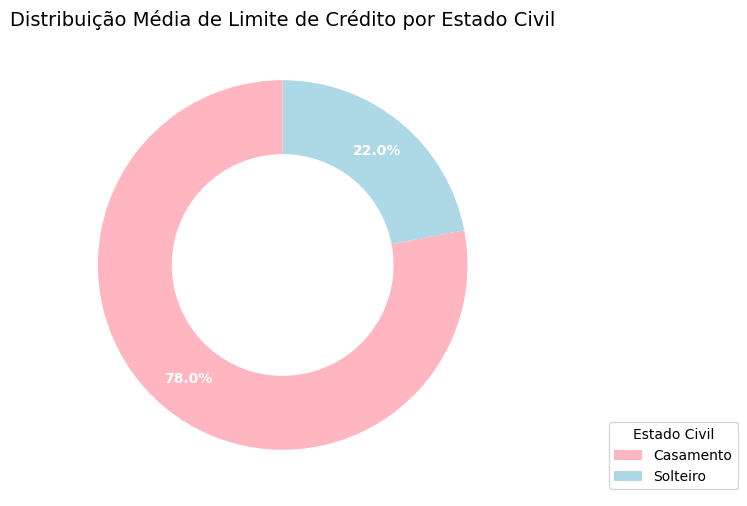

In [8]:
# Agrupamento dos dados
salario_Limite_Credito = df.groupby('Estado_Civil')['Limite_Credito'].mean()

# Configuração do gráfico
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))

# Criação do gráfico de rosca
wedges, texts, autotexts = ax.pie(
    salario_Limite_Credito,
    autopct='%1.1f%%',
    colors=['lightpink', 'lightblue'], 
    wedgeprops=dict(width=0.4),  # Define a largura da rosca
    startangle=90  # Inicia o gráfico na vertical
)

# Ajuste do estilo das porcentagens
for autotext, wedge in zip(autotexts, wedges):
    autotext.set_color("white")  # Define a cor como branca
    autotext.set_fontsize(10)    # Ajusta o tamanho da fonte
    autotext.set_fontweight("bold")  # Define a fonte como negrito
    
    # Recalcula a posição para centralizar no meio da rosca
    angle = (wedge.theta2 + wedge.theta1) / 2  # Ângulo médio do setor
    x = 0.8 * wedge.r * np.cos(np.radians(angle))  # Coordenada x
    y = 0.8 * wedge.r * np.sin(np.radians(angle))  # Coordenada y
    autotext.set_position((x, y))

# Adicionando a legenda
ax.legend(
    wedges,
    salario_Limite_Credito.index,
    title="Estado Civil",
    loc="lower right",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

# Título e exibição do gráfico
ax.set_title("Distribuição Média de Limite de Crédito por Estado Civil", fontsize=14)
plt.savefig("grafico_rosca.png", dpi=300, bbox_inches='tight')
plt.show()

### Relação entre Salário, Limite de Crédito e Inapimplência

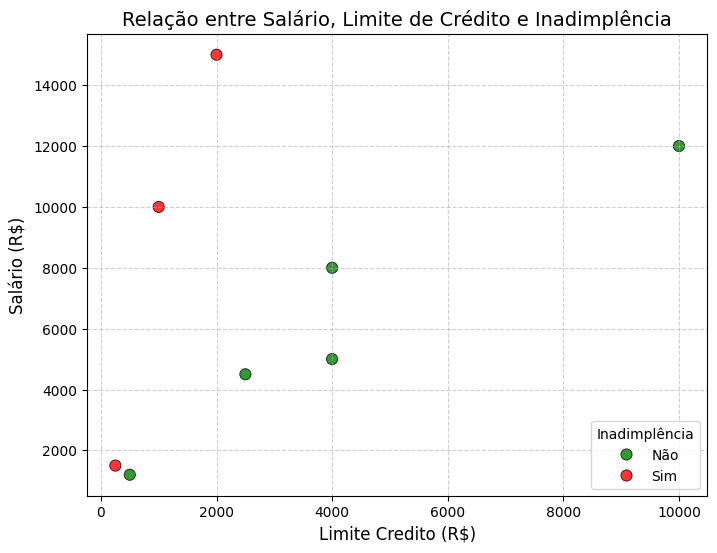

In [9]:
# Criação do gráfico
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Limite_Credito', 
    y='Salário', 
    hue='Inadimplencia',  # Adiciona a cor com base na variável
    data=df,
    alpha=0.8,
    edgecolor='k', 
    palette={'Sim': 'red', 'Não': 'green'},
    s=65
    )
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlabel('Limite Credito (R$)', fontsize=12)
plt.ylabel('Salário (R$)', fontsize=12)
plt.legend(title="Inadimplência", loc="lower right")

# Titulo e exibição
plt.title('Relação entre Salário, Limite de Crédito e Inadimplência', fontsize=14)
plt.savefig("grafico_dispersao.png", dpi=300, bbox_inches='tight')
plt.show()

## Conclusão

### Relação entre Variáveis 
De acordo com o mapa de calor, podemos observar que as variáveis que mais possuem correlação são: idade - salário; imóvel próprio - salário; e imóvel próprio - idade. A importância de averiguar essa correlação logo de cara serve para poder ter um direcionamento melhor de como organizar a análise através dos gráficos. Esse é um tipo de abordagem que gosto de realizar, pois me ajuda bastante. 
Porém, dentro dessa primeira análise, não é possível averiguar nenhuma relação forte com o limite de crédito, que é o foco dessa atividade. Dessa forma, me ocorreu de focar nas variáveis categóricas, pois poderia adicionar informações adicionais, uma vez que elas não entraram na análise feita pelo gráfico de correlação. 

### Gráfico de Média Salarial e Limite de Crédito por Profissão

Esse gráfico deixou claro que o salário não está relacionado ao limite de crédito, assim como a profissão, porém, nota-se que a profissão de médico e professor tem um certo equilíbrio dessas duas variáveis, de maneira proporcional ao seu valor monetário, enquanto as profissões de advogado e engenheiro e exatamente o oposto: limites altos, porém salário baixo.

### Gráfico de Distribuição Média de Limite de Crédito por Estado Civil
Esse gráfico trouxe mais uma informação importante: podemos observar que as pessoas que são casadas tem um limite de crédito maior. Isso pode se dever ao fato de que pessoas casadas tendem a precisar de mais limite para lidar com gastos extras ligados a família. 

### Gráfico de Relação entre Salário, Limite de Crédito e Inadimplência
Esse último gráfico trás a informação de que a inadimplência está presente em pessoas de salário alto. Isso pode significar que as pessoas acabam se tornando mal pagantes por terem um limite baixo de crédito, mesmo que com um salário alto, elas de alguma maneira não conseguem acompanhar suas dívidas. <br>
É importante salientar também que, após analisar o primeiro gráfico, é possível até prever quais são as possíveis profissões desses inadimplentes. <br>
Com isso, uma boa proposta de solução para esse problema é de fato equilibrar esse limite de crédito para pessoas que possuem um salário mais alto, (assim como é observado nas profissões médico e professor) para, assim, conseguir lidar com os gastos que pessoas que ganham mais possuem.  